This notebook was created to test the pymodbus TCP communication with an ACROMAG BusWorks XT1541-000 while writing the `busworks` package. It is likely of negligible value for most users. 

A lot of good pymodbus examples on: https://pymodbus.readthedocs.io/en/latest/source/example/modules.html

In [1]:
from pymodbus.client.sync import ModbusTcpClient
import matplotlib.pyplot as plt
from time import time
from time import sleep
import numpy as np

# Measured DC voltage by multimeter (Agilent U1272A)

In [2]:
# From multimeter
# ------------------

x_pos = np.array([5.4e-3, 2.190, 4.374, 6.558, 8.743, 10.005, 10.105, 
                  10.138, 10.171, 10.205, 10.232, 10.232, 10.232])
y_pos = np.array([0, 6554, 13107, 19661, 26214, 30000, 30300, 
                  30400, 30500, 30600, 30682, 32000,  32767])

x_neg = np.array([-10.235, -10.235, -10.173, -8.732, -6.548, -4.363, -2.180, 4.8e-3 ])
y_neg = np.array([32768, 33000, 35000, 39321, 45874, 52428, 58981, 65535])

y_neg -= 65536

Clearly not linear at the end points

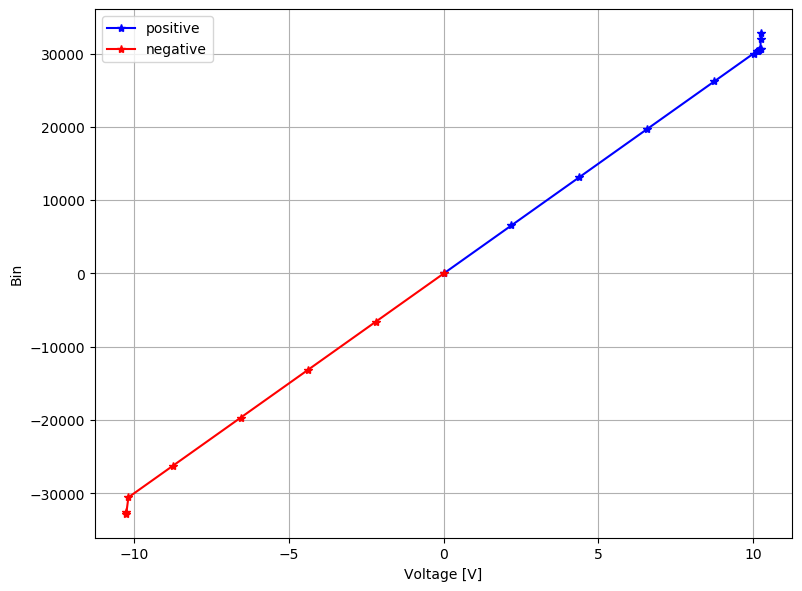

In [3]:
fig = plt.figure(figsize=(9,7),dpi=100)
ax = fig.add_subplot(111)
ax.plot(x_pos, y_pos, 'b-*', label='positive')
ax.plot(x_neg, y_neg, 'r-*', label='negative')
ax.set_ylabel('Bin')
ax.set_xlabel('Voltage [V]')
ax.grid()
ax.legend()
plt.show(fig)

But it's linear between -10 V and 10 V

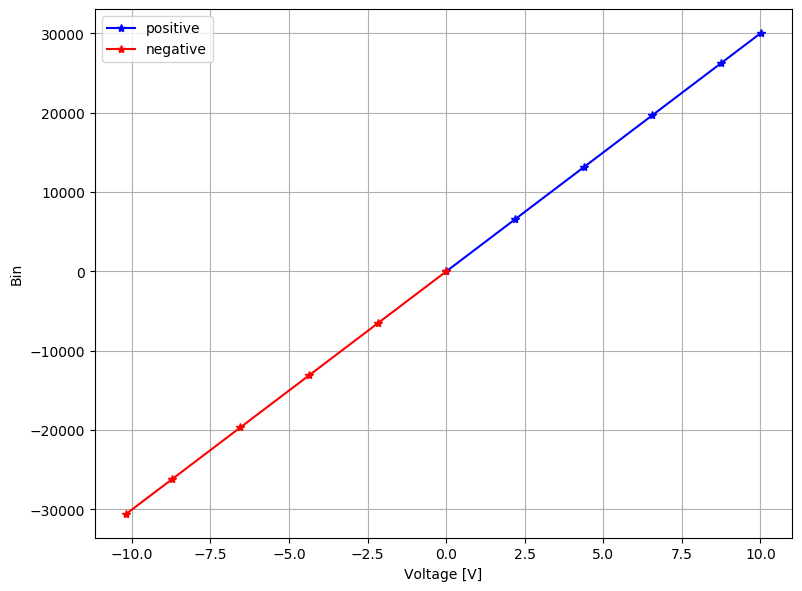

In [4]:
fig = plt.figure(figsize=(9,7),dpi=100)
ax = fig.add_subplot(111)
ax.plot(x_pos[:6], y_pos[:6], 'b-*', label='positive')
ax.plot(x_neg[2:], y_neg[2:], 'r-*', label='negative')
ax.set_ylabel('Bin')
ax.set_xlabel('Voltage [V]')
ax.grid()
ax.legend()
plt.show(fig)

# Measured by oscilloscope (Tektronix TDS 2014)

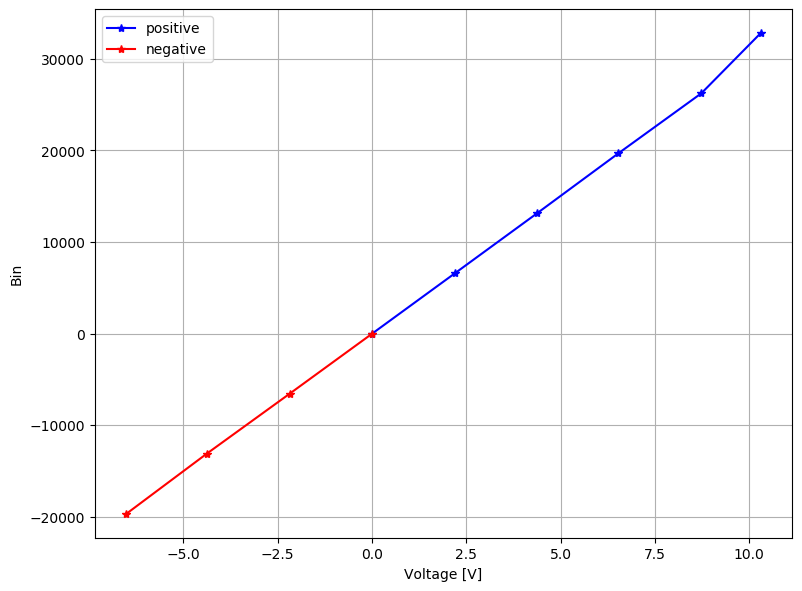

In [5]:
x_pos = np.array([7e-3, 2.19, 4.37, 6.53, 8.73, 10.3])
y_pos = np.array([0, 6554, 13107, 19661, 26214, 32767])

x_neg = np.array([-10.2, -8.69, -6.51, -4.38, -2.18, 7e-3 ])
y_neg = np.array([32768, 39321, 45874, 52428, 58981, 65535])

y_neg -= 65536

fig = plt.figure(figsize=(9,7),dpi=100)
ax = fig.add_subplot(111)
ax.plot(x_pos[:6], y_pos[:6], 'b-*', label='positive')
ax.plot(x_neg[2:], y_neg[2:], 'r-*', label='negative')
ax.set_ylabel('Bin')
ax.set_xlabel('Voltage [V]')
ax.grid()
ax.legend()
plt.show(fig)

# Speed tests

In [6]:
from pymodbus.client.sync import ModbusTcpClient
import matplotlib.pyplot as plt
from time import time
from time import sleep
import numpy as np

## Timing of `time()`

In [7]:
N = 10000
t = np.zeros(N)
t0 = time()
for k,N in enumerate(range(N)):
    t[k] = time()
t1 = time()
print('Elapsed time: {}'.format(t1-t0))
print('Average time: {}'.format(np.diff(t).mean()))
print('Minimum time: {}'.format(np.diff(t).min()))
print('Maximum time: {}'.format(np.diff(t).max()))

Elapsed time: 0.002090930938720703
Average time: 2.0293834650799064e-07
Minimum time: 0.0
Maximum time: 1.2159347534179688e-05


## Timing of `time()` + assignment + math operation

In [8]:
N = 10000
t = np.zeros(N)
t0 = time()
for k,N in enumerate(range(N)):
    a = 10*4.1
    t[k] = time()
t1 = time()
print('Elapsed time: {}'.format(t1-t0))
print('Average time: {}'.format(np.diff(t).mean()))
print('Minimum time: {}'.format(np.diff(t).min()))
print('Maximum time: {}'.format(np.diff(t).max()))

Elapsed time: 0.0022165775299072266
Average time: 2.1586192585322986e-07
Minimum time: 0.0
Maximum time: 2.288818359375e-05


## Timing of `time()` + `if` +  assignment + math operation + 

In [9]:
N = 10000
t = np.zeros(N)
t0 = time()
for k,N in enumerate(range(N)):
    if N>1:
        a = 10*4.1
    t[k] = time()
t1 = time()
print('Elapsed time: {}'.format(t1-t0))
print('Average time: {}'.format(np.diff(t).mean()))
print('Minimum time: {}'.format(np.diff(t).min()))
print('Maximum time: {}'.format(np.diff(t).max()))

Elapsed time: 0.002470254898071289
Average time: 2.399207663686291e-07
Minimum time: 0.0
Maximum time: 1.5020370483398438e-05


## Timing of DAC calls via TCP

In [10]:
client = ModbusTcpClient('192.168.1.231', port=502)
Ns = np.linspace(0,30000,10000, dtype=int)
t = np.zeros(len(Ns))
t0 = time()
for k,N in enumerate(Ns):
    client.write_register(1, N)
    t[k] = time()
t1 = time()
client.close()
print('Elapsed time: {:.3f} s'.format(t1-t0))
print('Average time: {:.3f} ms'.format(np.diff(t).mean()*1e3))
print('Minimum time: {:.3f} ms'.format(np.diff(t).min()*1e3))
print('Maximum time: {:.3f} ms'.format(np.diff(t).max()*1e3))
print('Std: {:.3f} ms'.format(np.diff(t).std()*1e3))

Elapsed time: 10.093 s
Average time: 1.009 ms
Minimum time: 0.911 ms
Maximum time: 3.022 ms
Std: 0.156 ms


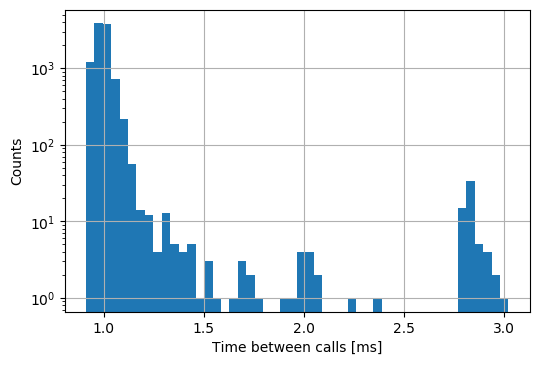

In [11]:
dt = np.diff(t)
fig = plt.figure(figsize=(6,4), dpi=100)
ax = fig.add_subplot(111)
ax.hist(dt*1e3, bins = 50, log=True)
ax.grid()
ax.set_xlabel('Time between calls [ms]')
ax.set_ylabel('Counts')
plt.show(fig)

## Limit of DAC updates

### 1 channel

DAC-calls spaced equally by `dt`. This generates uneven steps. I.e., the time between the outputs are uneven, which is seen on an oscilloscope. Thus, this test requires an oscilloscope on which one can see if all the written voltages where sent to the output or not.

**5 ms seems to be an okay margin, but on rare occassions it's not long enough. Perhaps use 10 ms to be safe.**

In [12]:
#x_pos = np.array([5.4e-3, 2.190, 4.374, 6.558, 8.743, 10.005])
#y_pos = np.array([0, 6554, 13107, 19661, 26214, 30000])

#x_neg = np.array([-10.173, -8.732, -6.548, -4.363, -2.180])
#y_neg = np.array([35000, 39321, 45874, 52428, 58981])

client = ModbusTcpClient('192.168.1.231', port=502)

Ns = np.array([35000, 39321, 45874, 52428, 58981, 0, 6554, 13107, 19661, 26214, 30000])
t = np.zeros(len(Ns)+1)
ST = np.zeros(len(Ns))
t0 = time()
t[0] = t0
dT = 5e-3
for k,N in enumerate(Ns):
    #print(time() - t[k-1])
    #print(st - ( time() - t[k-1] ) )
    # Sleep time
    ST[k] = dT-(time()-t[k]) - 7e-5
    sleep(ST[k])
    t[k+1] = time()
    client.write_register(1, N)
    # t[k] = time()
t1 = time()

client.close()
print('Elapsed time: {:.3f} s'.format(t1-t0))
print('Average time: {:.3f} ms'.format(np.diff(t).mean()*1e3))
print('Minimum time: {:.3f} ms'.format(np.diff(t).min()*1e3))
print('Maximum time: {:.3f} ms'.format(np.diff(t).max()*1e3))
print('Std: {:.3f} ms'.format(np.diff(t).std()*1e3))
print()
print('Average sleep time: {:.3f} ms'.format(ST.mean()*1e3))
print('Minimum sleep time: {:.3f} ms'.format(ST.min()*1e3))
print('Maximum sleep time: {:.3f} ms'.format(ST.max()*1e3))
print('Std: {:.3f} ms'.format(ST.std()*1e3))


Elapsed time: 0.057 s
Average time: 5.037 ms
Minimum time: 4.996 ms
Maximum time: 5.351 ms
Std: 0.099 ms

Average sleep time: 3.687 ms
Minimum sleep time: 1.383 ms
Maximum sleep time: 4.836 ms
Std: 0.789 ms


### 8 channels

The update frequency for 8 channels seem to be the same as for 1 channel.

**Writing to 8 channels seems to take the same amount of time as writing to 1 channel** 

In [13]:
#x_pos = np.array([5.4e-3, 2.190, 4.374, 6.558, 8.743, 10.005])
#y_pos = np.array([0, 6554, 13107, 19661, 26214, 30000])

#x_neg = np.array([-10.173, -8.732, -6.548, -4.363, -2.180])
#y_neg = np.array([35000, 39321, 45874, 52428, 58981])

client = ModbusTcpClient('192.168.1.231', port=502)

Ns = np.array([35000, 39321, 45874, 52428, 58981, 0, 6554, 13107, 19661, 26214, 30000])
Ns2 = Ns[::-1]
t = np.zeros(len(Ns)+1)
ST = np.zeros(len(Ns))
t0 = time()
t[0] = t0
dT = 5e-3
for k,(N,N2) in enumerate(zip(Ns,Ns2)):
    #print(time() - t[k-1])
    #print(st - ( time() - t[k-1] ) )
    # Sleep time
    ST[k] = dT-(time()-t[k]) - 7.5e-5
    sleep(ST[k])
    t[k+1] = time()
    client.write_registers(1, [N,N2,N,N2,N,N,N,N2])
    # t[k] = time()
t1 = time()

client.close()
print('Elapsed time: {:.3f} s'.format(t1-t0))
print('Average time: {:.3f} ms'.format(np.diff(t).mean()*1e3))
print('Minimum time: {:.3f} ms'.format(np.diff(t).min()*1e3))
print('Maximum time: {:.3f} ms'.format(np.diff(t).max()*1e3))
print('Std: {:.3f} ms'.format(np.diff(t).std()*1e3))
print()
print('Average sleep time: {:.3f} ms'.format(ST.mean()*1e3))
print('Minimum sleep time: {:.3f} ms'.format(ST.min()*1e3))
print('Maximum sleep time: {:.3f} ms'.format(ST.max()*1e3))
print('Std: {:.3f} ms'.format(ST.std()*1e3))


Elapsed time: 0.056 s
Average time: 5.003 ms
Minimum time: 4.991 ms
Maximum time: 5.025 ms
Std: 0.009 ms

Average sleep time: 3.725 ms
Minimum sleep time: 2.610 ms
Maximum sleep time: 4.824 ms
Std: 0.491 ms


# Multiple channels + making input list

In the current `loop_sinuses()` method, the input list is constructed just before calling the `write_registers()` method, therefore we time the function calls in this case as well.

**It takes slightly longer, but it's well within the uncertainty of the DAC update time.**

In [14]:
#x_pos = np.array([5.4e-3, 2.190, 4.374, 6.558, 8.743, 10.005])
#y_pos = np.array([0, 6554, 13107, 19661, 26214, 30000])

#x_neg = np.array([-10.173, -8.732, -6.548, -4.363, -2.180])
#y_neg = np.array([35000, 39321, 45874, 52428, 58981])

client = ModbusTcpClient('192.168.1.231', port=502)

Ns = np.array([35000, 39321, 45874, 52428, 58981, 0, 6554, 13107, 19661, 26214, 30000])
Ns = np.linspace(0,30000,1001).astype(int)
Ns2 = Ns[::-1]
Ns3 = np.round(Ns/2).astype(int)
Nls = [Ns,Ns2, Ns3, Ns, Ns2, Ns3]
# Nls = [Ns]

t = np.zeros(len(Ns)+1)
ST = np.zeros(len(Ns))
t0 = time()
t[0] = t0
dT = 5e-3
for k in range(len(Ns)):
    #print(time() - t[k-1])
    #print(st - ( time() - t[k-1] ) )
    # Sleep time
    ls = []
    for i, nls in enumerate(Nls):
        ls.append(nls[k])
    ST[k] = dT-(time()-t[k]) - 8.4e-5
    sleep(ST[k])
    t[k+1] = time()
    client.write_registers(1, ls)
    # t[k] = time()
t1 = time()

client.close()
print('Elapsed time: {:.3f} s'.format(t1-t0))
print('Average time: {:.3f} ms'.format(np.diff(t).mean()*1e3))
print('Minimum time: {:.3f} ms'.format(np.diff(t).min()*1e3))
print('Maximum time: {:.3f} ms'.format(np.diff(t).max()*1e3))
print('Std: {:.3f} ms'.format(np.diff(t).std()*1e3))
print()
print('Average sleep time: {:.3f} ms'.format(ST.mean()*1e3))
print('Minimum sleep time: {:.3f} ms'.format(ST.min()*1e3))
print('Maximum sleep time: {:.3f} ms'.format(ST.max()*1e3))
print('Std: {:.3f} ms'.format(ST.std()*1e3))


Elapsed time: 5.005 s
Average time: 4.999 ms
Minimum time: 4.939 ms
Maximum time: 6.362 ms
Std: 0.053 ms

Average sleep time: 3.759 ms
Minimum sleep time: 1.820 ms
Maximum sleep time: 4.786 ms
Std: 0.150 ms
